This file visualizes data from the World Happiness Report years 2015 - 2021. The data is available on [GitHub](https://github.com/L-in-da/Influences-and-Developments-concerning-the-World-Happiness-Report/tree/main/Data).

In [50]:
import pandas as pd 
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import numpy
import json
from shapely.geometry import shape
from shapely.geometry import MultiPolygon
from shapely import wkt
import numpy as np
from tueplots import bundles
import warnings
warnings.filterwarnings("ignore")


plt.rcParams.update(bundles.neurips2021(usetex=False))

In [51]:
data_2021 = pd.read_csv("Data/2021.csv")
data_2020 = pd.read_csv("Data/2020.csv")
data_2019 = pd.read_csv("Data/2019.csv")
data_2018 = pd.read_csv("Data/2018.csv")
data_2017 = pd.read_csv("Data/2017.csv")
data_2016 = pd.read_csv("Data/2016.csv")
data_2015 = pd.read_csv("Data/2015.csv")

# from string to geometry object
def parse_geom(geom_str):
    try:
        return shape(json.loads(geom_str))
    except (TypeError, AttributeError):  # Handle NaN and empty strings
        return None

df = pd.read_csv('Data/countries_geojson.csv')
df["geojson"] = df["geojson"].apply(parse_geom)
world_map_data = gpd.GeoDataFrame(df, geometry="geojson")

# for comparing happiness scores between different continents
continents = []
for i in range(len(world_map_data["CONTINENT"].values)):
    if (world_map_data["CONTINENT"].values[i] not in continents):
        continents.append(world_map_data["CONTINENT"].values[i])

print(continents)


['Oceania', 'Africa', 'North America', 'Asia', 'South America', 'Europe', 'Seven seas (open ocean)', 'Antarctica']


In [52]:
# changing country names in case world map data has different notation
data_2021 = data_2021.rename(columns={"Ladder score": "Happiness Score"})
data_2021_not_in_worldmap = data_2021[~data_2021["Country name"].isin(world_map_data["NAME_EN"])] 
world_map_data_missing = world_map_data[~world_map_data["NAME_EN"].isin(data_2021["Country name"])] 

data_2021.iloc[18,0] = "United States of America"
data_2021.iloc[73,0] = "Turkish Republic of Northern Cyprus"
data_2021.iloc[97,0] ="The Gambia"
data_2021.iloc[83,0] = "People's Republic of China"
data_2021.iloc[23,0] = "Taiwan"
data_2021.iloc[93,0]= "Republic of Macedonia"
data_2021.iloc[82,0] = "Republic of the Congo"
data_2021.iloc[124,0] = "Palestine"

data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [53]:
# world map data for countries for which happiness data is available
world_map_data_available = world_map_data[world_map_data["NAME_EN"].isin(data_2021["Country name"])] 
# only considering countries for which world_map data is available
data_2021 = data_2021[data_2021["Country name"].isin(world_map_data["NAME_EN"])]

# add new columns
data_2021["population"] = data_2021["Country name"]
data_2021["continent"] = data_2021["Country name"]
data_2021["geometry"] = data_2021["Country name"]


# fill in the polygon values, population and continent
for i in range(len(data_2021["Country name"])):
    data_2021.iloc[i,len(data_2021.iloc[0,:])-3] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2021.iloc[i,0]]["POP_EST"]
    data_2021.iloc[i,len(data_2021.iloc[0,:])-2] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2021.iloc[i,0]]["CONTINENT"]
    data_2021.iloc[i,len(data_2021.iloc[0,:])-1] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2021.iloc[i,0]]["geojson"]

In [54]:
# changing country names in case world map data has different notation for 2020
data_2020 = data_2020.rename(columns={"Ladder score": "Happiness Score"})
data_2020_not_in_worldmap = data_2020[~data_2020["Country name"].isin(world_map_data["NAME_EN"])] 
world_map_data_missing_2020 = world_map_data[~world_map_data["NAME_EN"].isin(data_2020["Country name"])] 

data_2020.iloc[17,0] = "United States of America"
data_2020.iloc[75,0] = "Turkish Republic of Northern Cyprus"
data_2020.iloc[112,0] ="The Gambia"
data_2020.iloc[93,0] = "People's Republic of China"
data_2020.iloc[24,0] = "Taiwan"
data_2020.iloc[89,0]= "Republic of Macedonia"
data_2020.iloc[87,0] = "Republic of the Congo"
data_2020.iloc[124,0] = "Palestine"

In [55]:
# world map data for countries for which happiness data is available
world_map_data_available = world_map_data[world_map_data["NAME_EN"].isin(data_2020["Country name"])] 
#only considering countries for which world_map data is available
data_2020 = data_2020[data_2020["Country name"].isin(world_map_data["NAME_EN"])]

# add new columns
data_2020["population"] = data_2020["Country name"]
data_2020["continent"] = data_2020["Country name"]
data_2020["geometry"] = data_2020["Country name"]


# fill in the polygon values, population and continent
for i in range(len(data_2020["Country name"])):
    data_2020.iloc[i,len(data_2020.iloc[0,:])-3] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2020.iloc[i,0]]["POP_EST"]
    data_2020.iloc[i,len(data_2020.iloc[0,:])-2] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2020.iloc[i,0]]["CONTINENT"]
    data_2020.iloc[i,len(data_2020.iloc[0,:])-1] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2020.iloc[i,0]]["geojson"]

In [56]:
# changing country names in case world map data has different notation for 2019
data_2019 = data_2019.rename(columns={"Country or region": "Country name", "Score":"Happiness Score"})
data_2019_not_in_worldmap = data_2019[~data_2019["Country name"].isin(world_map_data["NAME_EN"])] 
world_map_data_missing_2019 = world_map_data[~world_map_data["NAME_EN"].isin(data_2019["Country name"])] 

data_2019.iloc[18,1] = "United States of America"
data_2019.iloc[63,1] = "Turkish Republic of Northern Cyprus"
data_2019.iloc[119,1] ="The Gambia"
data_2019.iloc[92,1] = "People's Republic of China"
data_2019.iloc[83,1]= "Republic of Macedonia"
data_2019.iloc[102,1] = "Republic of the Congo"
data_2019.iloc[109,1] = "Palestine"
data_2019.iloc[38,1] ="Trinidad and Tobago"

In [57]:
# world map data for countries for which happiness data is available
world_map_data_available = world_map_data[world_map_data["NAME_EN"].isin(data_2019["Country name"])] 
# only considering countries for which world_map data is available
data_2019 = data_2019[data_2019["Country name"].isin(world_map_data["NAME_EN"])]

# add new columns
data_2019["population"] = data_2019["Country name"]
data_2019["continent"] = data_2019["Country name"]
data_2019["geometry"] = data_2019["Country name"]


# fill in the polygon values, population and continent
for i in range(len(data_2019["Country name"])):
    data_2019.iloc[i,len(data_2019.iloc[0,:])-3] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2019.iloc[i,1]]["POP_EST"]
    data_2019.iloc[i,len(data_2019.iloc[0,:])-2] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2019.iloc[i,1]]["CONTINENT"]
    data_2019.iloc[i,len(data_2019.iloc[0,:])-1] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2019.iloc[i,1]]["geojson"]

In [58]:
# changing country names in case world map data has different notation for 2018
data_2018 = data_2018.rename(columns={"Country or region": "Country name", "Score": "Happiness Score"})
data_2018_not_in_worldmap = data_2018[~data_2018["Country name"].isin(world_map_data["NAME_EN"])] 
world_map_data_missing_2018 = world_map_data[~world_map_data["NAME_EN"].isin(data_2018["Country name"])] 

data_2018.iloc[17,1] = "United States of America"
data_2018.iloc[57,1] = "Turkish Republic of Northern Cyprus"
data_2018.iloc[85,1] = "People's Republic of China"
data_2018.iloc[88,1]= "Republic of Macedonia"
data_2018.iloc[113,1] = "Republic of the Congo"
data_2018.iloc[103,1] = "Palestine"
data_2018.iloc[37,1] = "Trinidad and Tobago"

In [59]:
# world map data for countries for which happiness data is available
world_map_data_available = world_map_data[world_map_data["NAME_EN"].isin(data_2018["Country name"])] 
# only considering countries for which world_map data is available
data_2018 = data_2018[data_2018["Country name"].isin(world_map_data["NAME_EN"])]

# add new columns
data_2018["population"] = data_2018["Country name"]
data_2018["continent"] = data_2018["Country name"]
data_2018["geometry"] = data_2018["Country name"]


# fill in the polygon values, population and continent
for i in range(len(data_2018["Country name"])):
    data_2018.iloc[i,len(data_2018.iloc[0,:])-3] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2018.iloc[i,1]]["POP_EST"]
    data_2018.iloc[i,len(data_2018.iloc[0,:])-2] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2018.iloc[i,1]]["CONTINENT"]
    data_2018.iloc[i,len(data_2018.iloc[0,:])-1] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2018.iloc[i,1]]["geojson"]

In [60]:
# changing country names in case world map data has different notation for 2017
data_2017 = data_2017.rename(columns={"Country": "Country name", "Happiness.Score": "Happiness Score"})
data_2017_not_in_worldmap = data_2017[~data_2017["Country name"].isin(world_map_data["NAME_EN"])] 
world_map_data_missing_2017 = world_map_data[~world_map_data["NAME_EN"].isin(data_2017["Country name"])] 

data_2017.iloc[13,0] = "United States of America"
data_2017.iloc[32,0] = "Taiwan"
data_2017.iloc[60,0] = "Turkish Republic of Northern Cyprus"
data_2017.iloc[78,0] = "People's Republic of China"
data_2017.iloc[91,0]= "Republic of Macedonia"
data_2017.iloc[123,0] = "Republic of the Congo"
data_2017.iloc[102,0] = "Palestine"


In [61]:
# world map data for countries for which happiness data is available
world_map_data_available = world_map_data[world_map_data["NAME_EN"].isin(data_2017["Country name"])] 
# only considering countries for which world_map data is available
data_2017 = data_2017[data_2017["Country name"].isin(world_map_data["NAME_EN"])]

# add new columns
data_2017["population"] = data_2017["Country name"]
data_2017["continent"] = data_2017["Country name"]
data_2017["geometry"] = data_2017["Country name"]


# fill in the polygon values, population and continent
for i in range(len(data_2017["Country name"])):
    data_2017.iloc[i,len(data_2017.iloc[0,:])-3] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2017.iloc[i,0]]["POP_EST"]
    data_2017.iloc[i,len(data_2017.iloc[0,:])-2] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2017.iloc[i,0]]["CONTINENT"]
    data_2017.iloc[i,len(data_2017.iloc[0,:])-1] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2017.iloc[i,0]]["geojson"]

In [62]:
# changing country names in case world map data has different notation for 2016
data_2016 = data_2016.rename(columns={"Country": "Country name",})
data_2016_not_in_worldmap = data_2016[~data_2016["Country name"].isin(world_map_data["NAME_EN"])] 
world_map_data_missing_2016 = world_map_data[~world_map_data["NAME_EN"].isin(data_2016["Country name"])] 

data_2016.iloc[13,0] = "United States of America"
data_2016.iloc[61,0] = "Turkish Republic of Northern Cyprus"
data_2016.iloc[82,0] = "People's Republic of China"
data_2016.iloc[94,0]= "Republic of Macedonia"
data_2016.iloc[126,0] = "Republic of the Congo"
data_2016.iloc[107,0] = "Palestine"
data_2016.iloc[96,0] = "Somaliland"

In [63]:
# world map data for countries for which happiness data is available
world_map_data_available = world_map_data[world_map_data["NAME_EN"].isin(data_2016["Country name"])] 
# only considering countries for which world_map data is available
data_2016 = data_2016[data_2016["Country name"].isin(world_map_data["NAME_EN"])]

#add new columns
data_2016["population"] = data_2016["Country name"]
data_2016["continent"] = data_2016["Country name"]
data_2016["geometry"] = data_2016["Country name"]


# fill in the polygon values, population and continent
for i in range(len(data_2016["Country name"])):
    data_2016.iloc[i,len(data_2016.iloc[0,:])-3] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2016.iloc[i,0]]["POP_EST"]
    data_2016.iloc[i,len(data_2016.iloc[0,:])-2] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2016.iloc[i,0]]["CONTINENT"]
    data_2016.iloc[i,len(data_2016.iloc[0,:])-1] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2016.iloc[i,0]]["geojson"]

In [64]:
# changing country names in case world map data has different notation for 2015
data_2015 = data_2015.rename(columns={"Country": "Country name",})
data_2015_not_in_worldmap = data_2015[~data_2015["Country name"].isin(world_map_data["NAME_EN"])] 
world_map_data_missing_2015 = world_map_data[~world_map_data["NAME_EN"].isin(data_2015["Country name"])] 

data_2015.iloc[14,0] = "United States of America"
data_2015.iloc[65,0] = "Turkish Republic of Northern Cyprus"
data_2015.iloc[83,0] = "People's Republic of China"
data_2015.iloc[92,0]= "Republic of Macedonia"
data_2015.iloc[138,0] = "Republic of the Congo"
data_2015.iloc[107,0] = "Palestine"
data_2015.iloc[90,0] = "Somaliland"

In [65]:
#world map data for countries for which happiness data is available
world_map_data_available = world_map_data[world_map_data["NAME_EN"].isin(data_2015["Country name"])] 
#only considering countries for which world_map data is available
data_2015 = data_2015[data_2015["Country name"].isin(world_map_data["NAME_EN"])]

#add new columns
data_2015["population"] = data_2015["Country name"]
data_2015["continent"] = data_2015["Country name"]
data_2015["geometry"] = data_2015["Country name"]


# fill in the polygon values, population and continent
for i in range(len(data_2015["Country name"])):
    data_2015.iloc[i,len(data_2015.iloc[0,:])-3] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2015.iloc[i,0]]["POP_EST"]
    data_2015.iloc[i,len(data_2015.iloc[0,:])-2] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2015.iloc[i,0]]["CONTINENT"]
    data_2015.iloc[i,len(data_2015.iloc[0,:])-1] = world_map_data_available[world_map_data_available["NAME_EN"] == data_2015.iloc[i,0]]["geojson"]

In [66]:
# Problem: The happiness score is given a standard error / CI columns / nothing for the different years.
# upper and lower whisker are [happiness +- 1.96 standard error]

#data_2015.head() # "Standard Error"
#data_2016.head() # "Upper Confidence Interval" + "Lower Confidence Interval"
#data_2017.head() # "Whisker.high" "Whisker.low"
#data_2018.head() #  Nothing
#data_2019.head() #  Nothing
#data_2020.head() # "Standard error of ladder score"
#data_2021.head() # "Standard error of ladder score"

#plt.plot(data_2015["Country name"],data_2015["Standard Error"]) # standard error in range ~ [0.02, 0.14]
#plt.xticks([])
#plt.show()

# goal: standard error of global happiness for one year
# hurdle: getting standard error of mean of standard errors
#         -> see computation as meta analysis? different countries give different estimations of same "effect"?
#            doesn't seem right, it's a different effect each time
#         -> weird physics paper on http://www.met.rdg.ac.uk/~swrhgnrj/combining_errors.pdf, doesn't seem right either
#            formula, if existent, might be too complicated anyway

# ----------------> ignore and move on, maybe come back later

# under the (strong!) assumption that countries are independent, the SE = sqrt(sum(SE_Countries^2))
# --> assumption doesn't hold , leave out CIs for cross-country means

#print(len(data_2017))
#print(data_2016["Happiness Score"]-data_2016["Lower Confidence Interval"])
#print(sqrt(sum()
#data_2018.head()

In [67]:
# global Standard Errors, not feasible as the assumption of countrywise independence is not met

#SE_15 = np.sqrt(sum(data_2015["Standard Error"]**2))
#SE_16 = np.sqrt(sum(((data_2016["Happiness Score"]-data_2016["Lower Confidence Interval"])/1.96)**2))
#SE_17 = np.sqrt(sum(((data_2017["Happiness Score"]-data_2017["Whisker.low"])/1.96)**2))
#SE_18 = 0
#SE_19 = 0
#SE_20 = np.sqrt(sum(data_2020["Standard error of ladder score"]**2))
#SE_21 = np.sqrt(sum(data_2021["Standard error of ladder score"]**2))
#SEs = [SE_15,SE_16,SE_17,SE_18,SE_19,SE_20,SE_21]

#print(SEs)

In [68]:
#average non-population weighted
data_2021_available = data_2021[~data_2021["Happiness Score"].isnull()]
data_2021_available = data_2021_available.reset_index()
av_nonpop_weighted = data_2021_available["Happiness Score"].mean()
print("Average happiness Score not weighted by population: " + str(av_nonpop_weighted))

#average population weighted
av_pop_weighted = 0
pop=0
for i in range(len(data_2021_available)):
    av_pop_weighted = av_pop_weighted + data_2021_available["Happiness Score"][i]*data_2021_available["population"][i]
    pop += data_2021_available["population"][i]
av_pop_weighted = av_pop_weighted/pop

print("Average happiness Score weighted by population: " + str(av_pop_weighted))

Average happiness Score not weighted by population: 5.527985815602838
Average happiness Score weighted by population: 5.188841012175361


[5.373433333333333, 5.363221476510067, 5.337624159435298, 5.360013333333333, 5.408101351351352, 5.474385412208333, 5.527985815602838]


Text(0.5, 1.0, 'Global Happiness Score')

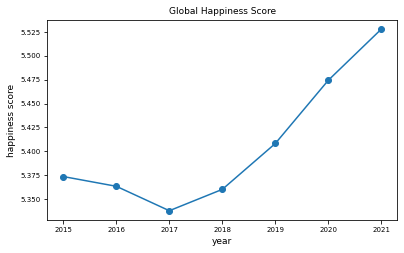

In [69]:
# average happiness non-population weighted for each year
av_nonpop_weighted_years =[]
for data in [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021]:
    data = data.reset_index()
    av_nonpop_weighted = data["Happiness Score"].mean()
    av_nonpop_weighted_years.append(av_nonpop_weighted)

print(av_nonpop_weighted_years)

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
plt.plot(years,av_nonpop_weighted_years,"-o")
# plt.errorbar(years,av_nonpop_weighted_years,yerr=[SE_15,SE_16,SE_17,SE_18,SE_19,SE_20,SE_21]) # not feasible
plt.xlabel("year")
plt.ylabel("happiness score")
plt.title("Global Happiness Score")

# SAVE AS PDF
# plt.savefig('global_av_non_weighted.pdf',bbox_inches='tight')

[5.2943653008784, 5.260605267043621, 5.24508720475959, 5.197850771875147, 5.172178003179635, 5.106996145432337, 5.188841012175361]


Text(0.5, 1.0, 'Global Happiness Score Weighted by Population')

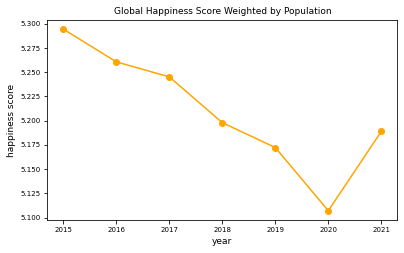

In [70]:
# average happiness population countrywise weighted for each year
av_pop_weighted_years =[]
for data in [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021]:
    pop = 0
    av_pop_weighted=0
    data = data.reset_index()
    for i in range(len(data)):
        av_pop_weighted = av_pop_weighted + data["Happiness Score"][i]*data["population"][i]
        pop += data["population"][i]
    av_pop_weighted_years.append(av_pop_weighted/pop)

print(av_pop_weighted_years)

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
plt.plot(years,av_pop_weighted_years,"-o",color="orange")
# plt.errorbar(years,av_pop_weighted_years,yerr=[SE_15,SE_16,SE_17,SE_18,SE_19,SE_20,SE_21]) # not feasible
plt.xlabel("year")
plt.ylabel("happiness score")
plt.title("Global Happiness Score Weighted by Population")

# SAVE AS PDF
# plt.savefig('global_av_weighted.pdf',bbox_inches='tight')

In [71]:
# get SE for the most populated countries for each year (2018 and 2019 give no standard error information)

SE_China = numpy.array([data_2015[data_2015["Country name"]=="People's Republic of China"]["Standard Error"].iloc[0],
            (data_2016[data_2016["Country name"]=="People's Republic of China"]["Upper Confidence Interval"].iloc[0]-data_2016[data_2016["Country name"]=="People's Republic of China"]["Happiness Score"].iloc[0])/1.96,
            (data_2017[data_2017["Country name"]=="People's Republic of China"]["Whisker.high"].iloc[0]-data_2017[data_2017["Country name"]=="People's Republic of China"]["Happiness Score"].iloc[0])/1.96,
            0,
            0,
            data_2020[data_2020["Country name"]=="People's Republic of China"]["Standard error of ladder score"].iloc[0],
            data_2021[data_2021["Country name"]=="People's Republic of China"]["Standard error of ladder score"].iloc[0]])

SE_India = numpy.array([data_2015[data_2015["Country name"]=="India"]["Standard Error"].iloc[0],
            (data_2016[data_2016["Country name"]=="India"]["Upper Confidence Interval"].iloc[0]-data_2016[data_2016["Country name"]=="India"]["Happiness Score"].iloc[0])/1.96,
            (data_2017[data_2017["Country name"]=="India"]["Whisker.high"].iloc[0]-data_2017[data_2017["Country name"]=="India"]["Happiness Score"].iloc[0])/1.96,
            0,
            0,
            data_2020[data_2020["Country name"]=="India"]["Standard error of ladder score"].iloc[0],
            data_2021[data_2021["Country name"]=="India"]["Standard error of ladder score"].iloc[0]])

SE_Indonesia = numpy.array([data_2015[data_2015["Country name"]=="Indonesia"]["Standard Error"].iloc[0],
            (data_2016[data_2016["Country name"]=="Indonesia"]["Upper Confidence Interval"].iloc[0]-data_2016[data_2016["Country name"]=="Indonesia"]["Happiness Score"].iloc[0])/1.96,
            (data_2017[data_2017["Country name"]=="Indonesia"]["Whisker.high"].iloc[0]-data_2017[data_2017["Country name"]=="Indonesia"]["Happiness Score"].iloc[0])/1.96,
            0,
            0,
            data_2020[data_2020["Country name"]=="Indonesia"]["Standard error of ladder score"].iloc[0],
            data_2021[data_2021["Country name"]=="Indonesia"]["Standard error of ladder score"].iloc[0]])

SE_USA = numpy.array([data_2015[data_2015["Country name"]=="United States of America"]["Standard Error"].iloc[0],
            (data_2016[data_2016["Country name"]=="United States of America"]["Upper Confidence Interval"].iloc[0]-data_2016[data_2016["Country name"]=="United States of America"]["Happiness Score"].iloc[0])/1.96,
            (data_2017[data_2017["Country name"]=="United States of America"]["Whisker.high"].iloc[0]-data_2017[data_2017["Country name"]=="United States of America"]["Happiness Score"].iloc[0])/1.96,
            0,
            0,
            data_2020[data_2020["Country name"]=="United States of America"]["Standard error of ladder score"].iloc[0],
            data_2021[data_2021["Country name"]=="United States of America"]["Standard error of ladder score"].iloc[0]])

SE_Brazil = numpy.array([data_2015[data_2015["Country name"]=="Brazil"]["Standard Error"].iloc[0],
            (data_2016[data_2016["Country name"]=="Brazil"]["Upper Confidence Interval"].iloc[0]-data_2016[data_2016["Country name"]=="Brazil"]["Happiness Score"].iloc[0])/1.96,
            (data_2017[data_2017["Country name"]=="Brazil"]["Whisker.high"].iloc[0]-data_2017[data_2017["Country name"]=="Brazil"]["Happiness Score"].iloc[0])/1.96,
            0,
            0,
            data_2020[data_2020["Country name"]=="Brazil"]["Standard error of ladder score"].iloc[0],
            data_2021[data_2021["Country name"]=="Brazil"]["Standard error of ladder score"].iloc[0]])


# Fill the zero values with the mean SE of the other years

SE_Brazil[3] = sum(SE_Brazil)/5
SE_Brazil[4] = SE_Brazil[3]

SE_China[3] = sum(SE_China)/5
SE_China[4] = SE_China[3]

SE_India[3] = sum(SE_India)/5
SE_India[4] = SE_India[3]

SE_USA[3] = sum(SE_USA)/5
SE_USA[4] = SE_USA[3]

SE_Indonesia[3] = sum(SE_Indonesia)/5
SE_Indonesia[4] = SE_Indonesia[3]

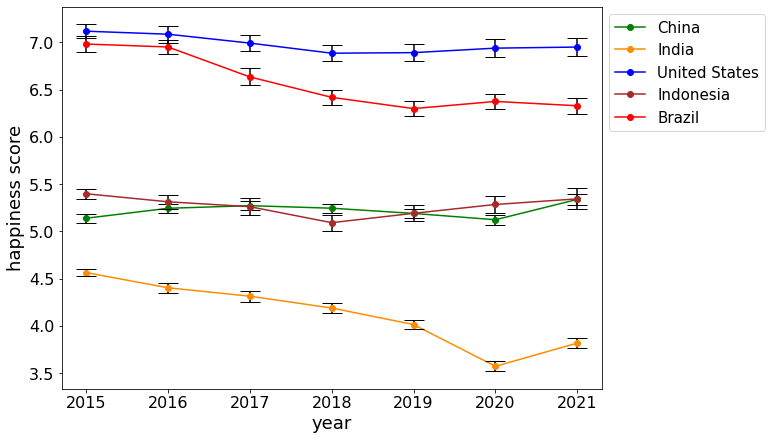

In [72]:
# most populated countries in comparison (added error bars [95% CIs], filled empty years with mean of remaining years)

av_india =[]
av_USA =[]
av_indonesia = []
av_china = []
av_brazil =[]

for data in [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021]:
    pop = 0
    
    data = data.reset_index()
    
    av1= data[data['Country name'] == "People's Republic of China"]["Happiness Score"].mean()
    av_china.append(av1)

    av2= data[data['Country name'] == 'India']["Happiness Score"].mean()
    av_india.append(av2)

    av3= data[data['Country name'] == 'United States of America']["Happiness Score"].mean()
    av_USA.append(av3)

    av4= data[data['Country name'] == 'Indonesia']["Happiness Score"].mean()
    av_indonesia.append(av4)

    av5= data[data['Country name'] == 'Brazil']["Happiness Score"].mean()
    av_brazil.append(av5)

plt.figure(figsize=(10.6,6))
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
plt.plot(years,av_china,"-o",label='China',color="green")
plt.errorbar(years,av_china,yerr=SE_China*1.96,color="black",linestyle="",capsize=10)
plt.plot(years, av_india,"-o",label="India",color="darkorange")
plt.errorbar(years,av_india,yerr=SE_India*1.96,color="black",linestyle="",capsize=10)
plt.plot(years, av_USA,"-o",label="United States",color="blue")
plt.errorbar(years,av_USA,yerr=SE_USA*1.96,color="black",linestyle="",capsize=10)
plt.plot(years, av_indonesia,"-o",label="Indonesia",color="brown")
plt.errorbar(years,av_indonesia,yerr=SE_Indonesia*1.96,color="black",linestyle="",capsize=10)
plt.plot(years,av_brazil,"-o",label="Brazil",color="red")
plt.errorbar(years,av_brazil,yerr=SE_Brazil*1.96,ecolor="black",linestyle="",capsize=10)
plt.xticks(fontsize=16)
plt.xlabel("year",fontsize=18)
plt.yticks(fontsize=16)
plt.ylabel("happiness score",fontsize=18)

plt.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize=15)

# the plot shows india's (and china's) influence on the global weighted mean in 2020 

# SAVE AS PDF
plt.savefig('most_populated_countries.pdf',bbox_inches='tight')

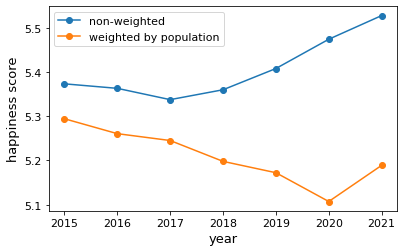

In [73]:
# Global Happiness Scores in Comparison
plt.plot(years,av_nonpop_weighted_years,"-o",label="non-weighted")
plt.plot(years,av_pop_weighted_years,"-o",label="weighted by population")
plt.xlabel("year",size=13)
plt.xticks(size=11)
plt.ylabel("happiness score",size=13)
plt.yticks(size=11)
plt.legend(fontsize=11)

# SAVE AS PDF
plt.savefig('global_avs.pdf',bbox_inches='tight')

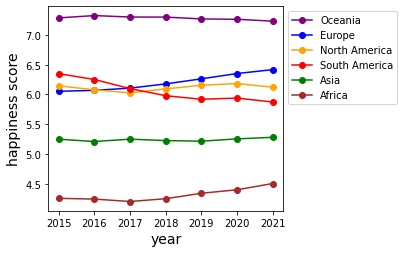

In [74]:
# different continents in comparison (non weighted)
av_europe =[]
av_africa =[]
av_north_america = []
av_asia = []
av_south_america =[]
av_oceania = []

for data in [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021]:
    pop = 0
    
    data = data.reset_index()
    
    av1= data[data['continent'] == 'Asia']["Happiness Score"].mean()
    av_asia.append(av1)

    av2= data[data['continent'] == 'Europe']["Happiness Score"].mean()
    av_europe.append(av2)

    av3= data[data['continent'] == 'Africa']["Happiness Score"].mean()
    av_africa.append(av3)

    av4= data[data['continent'] == 'North America']["Happiness Score"].mean()
    av_north_america.append(av4)

    av5= data[data['continent'] == 'South America']["Happiness Score"].mean()
    av_south_america.append(av5)
    
    av6= data[data['continent'] == 'Oceania']['Happiness Score'].mean()
    av_oceania.append(av6)


years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
plt.plot(years,av_oceania,"-o",label='Oceania',color="purple")
plt.plot(years, av_europe,"-o",label="Europe",color="blue")
plt.plot(years, av_north_america,"-o",label="North America",color="orange")
plt.plot(years, av_south_america,"-o",label="South America",color="red")
plt.plot(years,av_asia,"-o",label="Asia",color="green")
plt.plot(years, av_africa,"-o",label="Africa",color="brown")
plt.xlabel("year",size=14)
plt.xticks(size=10)
plt.ylabel("happiness score",size=14)
plt.yticks(size=10)

plt.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize=10)

# SAVE AS PDF
plt.savefig('continents_non_weighted.pdf',bbox_inches='tight')

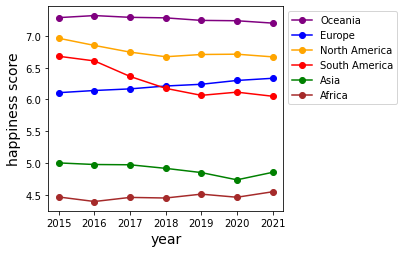

In [75]:
# different continents in comparison (countrywise weighted by population)

av_europe_weighted =[]
av_africa_weighted =[]
av_north_america_weighted = []
av_asia_weighted = []
av_south_america_weighted =[]
av_oceania_weighted = []

for data in [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021]:
    data = data.reset_index()
    
    pop1 = data[data['continent'] == 'Asia']["population"]
    av1= data[data['continent'] == 'Asia']["Happiness Score"]*pop1
    av1 = av1.sum()/pop1.sum()
    av_asia_weighted.append(av1)

    pop2 = data[data['continent'] == 'Europe']["population"]
    av2 = data[data['continent'] == 'Europe']["Happiness Score"]*pop2
    av2 = av2.sum()/pop2.sum()
    av_europe_weighted.append(av2)
    
    pop3 = data[data['continent'] == 'Africa']["population"]
    av3 = data[data['continent'] == 'Africa']["Happiness Score"]*pop3
    av3 = av3.sum()/pop3.sum()
    av_africa_weighted.append(av3)
    
    pop4 = data[data['continent'] == 'North America']["population"]
    av4 = data[data['continent'] == 'North America']["Happiness Score"]*pop4
    av4 = av4.sum()/pop4.sum()
    av_north_america_weighted.append(av4)
    
    pop5 = data[data['continent'] == 'South America']["population"]
    av5 = data[data['continent'] == 'South America']["Happiness Score"]*pop5
    av5 = av5.sum()/pop5.sum()
    av_south_america_weighted.append(av5)
    
    pop6 = data[data['continent'] == 'Oceania']["population"]
    av6 = data[data['continent'] == 'Oceania']["Happiness Score"]*pop6
    av6 = av6.sum()/pop6.sum()
    av_oceania_weighted.append(av6)


years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
plt.plot(years,av_oceania_weighted,"-o",label='Oceania',color="purple")
plt.plot(years, av_europe_weighted,"-o",label="Europe",color="blue")
plt.plot(years, av_north_america_weighted,"-o",label="North America",color="orange")
plt.plot(years, av_south_america_weighted,"-o",label="South America",color="red")
plt.plot(years,av_asia_weighted,"-o",label="Asia",color="green")
plt.plot(years, av_africa_weighted,"-o",label="Africa",color="brown")
plt.xlabel("year",size=14)
plt.xticks(size=10)
plt.ylabel("happiness score",size=14)
plt.yticks(size=10)

plt.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize=10)

# SAVE AS PDF
plt.savefig('continents_weighted.pdf',bbox_inches='tight')

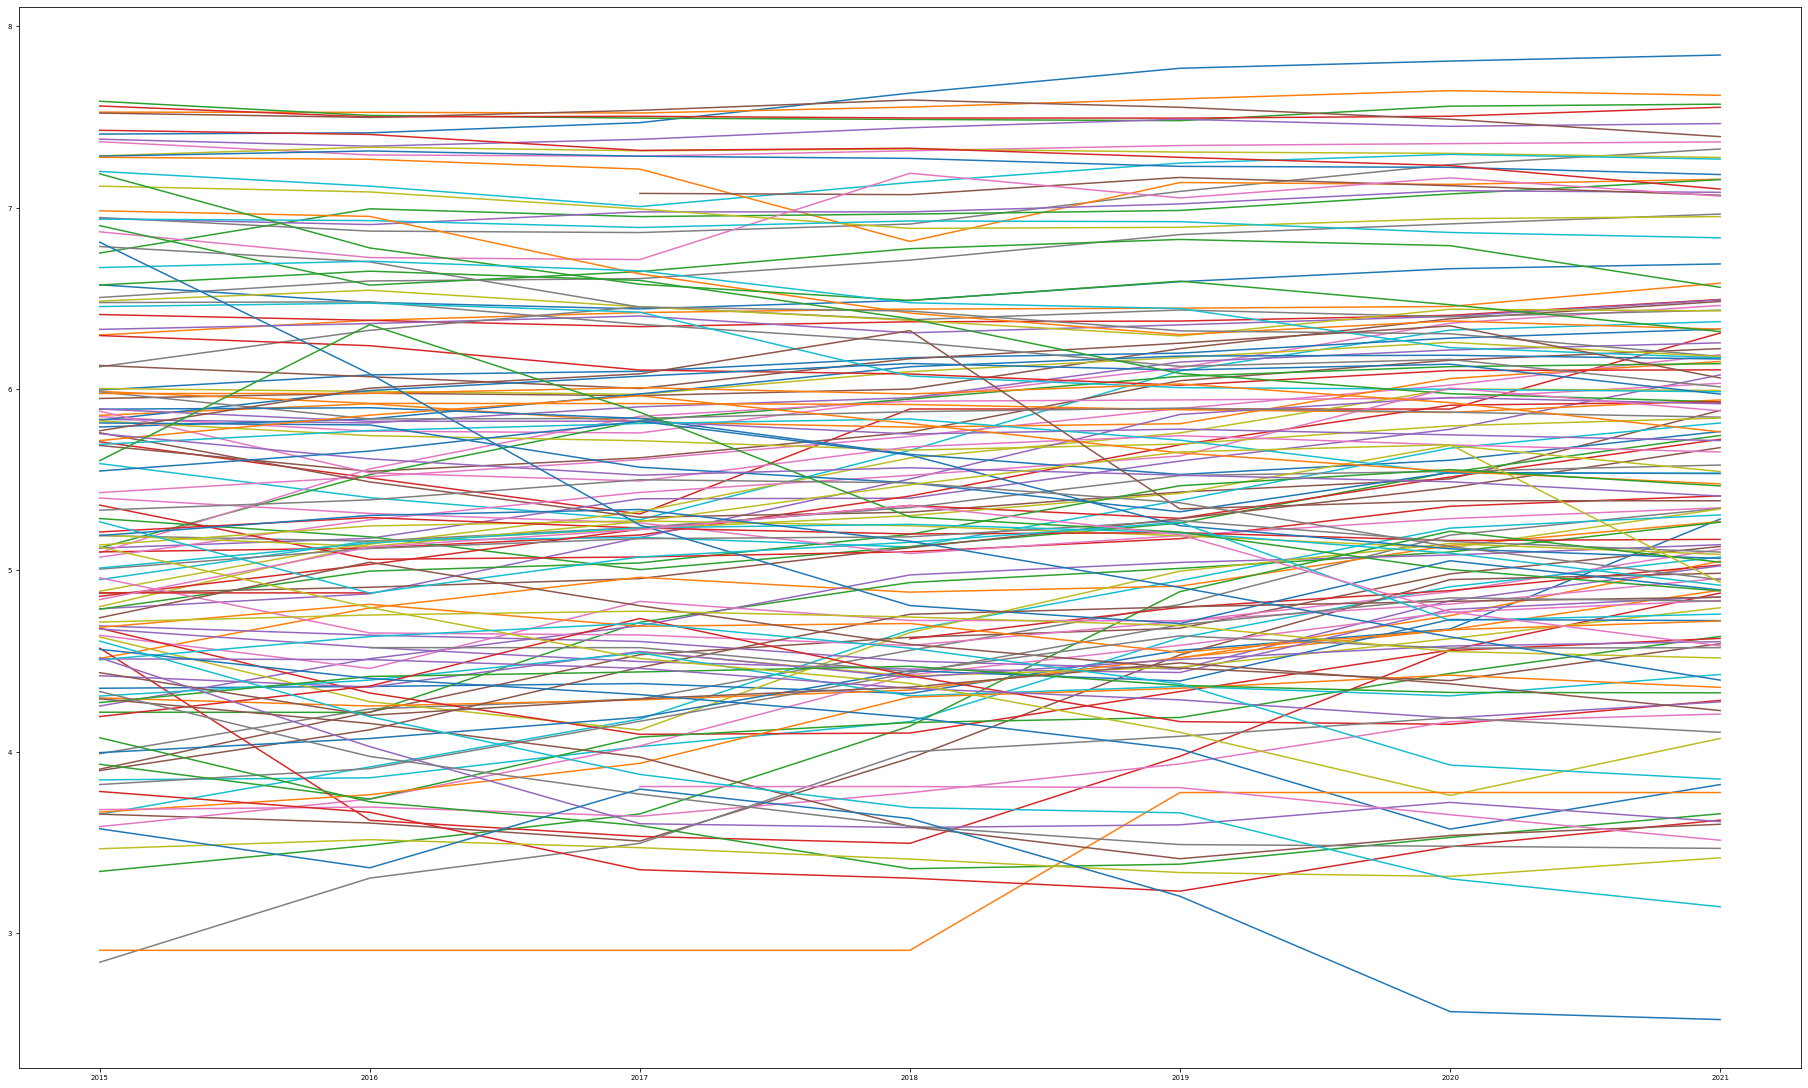

In [76]:
# different countries in comparison (plot is way too messy)

countries = data_2021["Country name"] # 2021 has the least countries
country_year_value = []
for i,country in enumerate(countries):
    country_year_value.append([])
    for data in [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020, data_2021]:
        if data[data["Country name"] == country]["Happiness Score"].empty:
            country_year_value[i].append(np.nan)
        else:
            country_year_value[i].append(data[data["Country name"] == country]["Happiness Score"])
            
plt.figure(figsize=(25,15))
            
for i,country in enumerate(countries):
    plt.plot(years,country_year_value[i],label=country)

plt.show()

In [77]:
# countries at the top of the happiness score (only zoom-in on above plot, messy)

#for i,country in enumerate(countries):
#    plt.plot(years,country_year_value[i],label=country)
#plt.ylim(7.4,7.9)
#plt.legend([1,2,3,4,5])
#plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

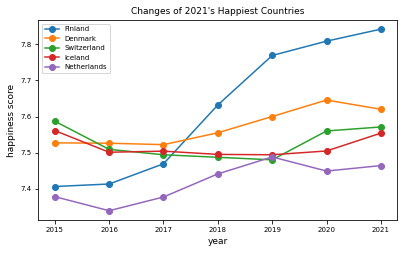

In [78]:
# countries at the top of the happiness score 

best_countries = data_2021["Country name"].head(5)

for i,country in enumerate(best_countries):
    plt.plot(years,country_year_value[i],"-o",label=country)

plt.xlabel("year")
plt.ylabel("happiness score")
plt.legend()
plt.title("Changes of 2021's Happiest Countries")
plt.show

# SAVE AS PDF
# plt.savefig('five_highest_countries.pdf',bbox_inches='tight')

,Country name,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,population,continent,geometry
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,0.451,0.731,0.007,0.405,0.103,0.015,1.800,1958042,Africa,(POLYGON ((28.97826256685724 -28.9555966122617...
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,1.099,0.724,0.340,0.539,0.027,0.088,0.648,2214858,Africa,(POLYGON ((29.43218834810904 -22.0913127580675...
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,0.364,0.202,0.407,0.627,0.227,0.493,1.095,11901484,Africa,(POLYGON ((30.41910485201924 -1.13465911215041...
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,0.457,0.649,0.243,0.359,0.157,0.075,1.205,13805084,Africa,(POLYGON ((31.19140913262128 -22.2515096981723...
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,...,0.370,0.000,0.126,0.000,0.122,0.010,1.895,34124811,Asia,(POLYGON ((66.51860680528867 37.36278432875879...


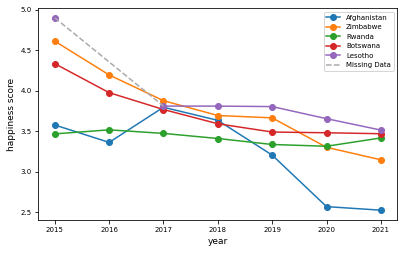

In [79]:
# countries at the bottom of the happiness score
worst_countries = data_2021["Country name"].tail(5)

for i,country in enumerate(worst_countries):
    plt.plot(years,country_year_value[len(country_year_value)-1-i],"-o")

xpoints=[2015,2017]
ypoints=[4.898,3.808]
plt.plot(xpoints, ypoints, linestyle = 'dashed',color="darkgray")
plt.legend(labels=["Afghanistan","Zimbabwe","Rwanda","Botswana","Lesotho","Missing Data"])
plt.xlabel("year")
plt.ylabel("happiness score")
data_2021.tail()

# SAVE AS PDF
# plt.savefig('five_lowest_countries.pdf',bbox_inches='tight')

In [80]:
# 139 countries in both 2015 and 2021
changes_countries = pd.Series(list(set(data_2015["Country name"]).intersection(set(data_2021["Country name"]))))

# DataFrame with corresponding happiness values and SEMs of 2015 and 2021
Diff_DF = pd.DataFrame()
Diff_DF["Country name"] = changes_countries
Diff_DF["Happiness 2015"] = data_2015.iloc[np.where(data_2015["Country name"].isin(changes_countries))].set_index("Country name").reindex(changes_countries).reset_index()["Happiness Score"]
Diff_DF["Standard Error 2015"] = data_2015.iloc[np.where(data_2015["Country name"].isin(changes_countries))].set_index("Country name").reindex(changes_countries).reset_index()["Standard Error"]
Diff_DF["Happiness 2021"] = data_2021.iloc[np.where(data_2021["Country name"].isin(changes_countries))].set_index("Country name").reindex(changes_countries).reset_index()["Happiness Score"]
Diff_DF["Standard Error 2021"] = data_2021.iloc[np.where(data_2021["Country name"].isin(changes_countries))].set_index("Country name").reindex(changes_countries).reset_index()["Standard error of ladder score"]

# Difference with Standard Error (Formula from Statistics Script mStat 2 part 3 page 115) -> REQUIRES UNAVAILABLE DATA 
# Diff_DF["Correlation 2015 2021"] = Diff_DF["Happiness 2015"].corr(Diff_DF["Happiness 2021"]) # WRONG
Diff_DF["Happiness Difference"] = Diff_DF["Happiness 2021"].subtract(Diff_DF["Happiness 2015"])
# Also wrong:
# Diff_DF["Difference Standard Error"] = Diff_DF["Standard Error 2015"]**2+Diff_DF["Standard Error 2021"]**2-2*Diff_DF["Correlation 2015 2021"].multiply(Diff_DF["Standard Error 2015"].multiply(Diff_DF["Standard Error 2021"]))

# Delete Rows with NaN values
Diff_DF = Diff_DF.iloc[np.where(~Diff_DF["Happiness Difference"].isnull())]

# Sort DF by Happiness Difference
Diff_DF = Diff_DF.sort_values(by="Happiness Difference",ascending=True)
Diff_DF.tail()

,Country name,Happiness 2015,Standard Error 2015,Happiness 2021,Standard Error 2021,Happiness Difference
67,Togo,2.839,0.06727,4.107,0.077,1.268
134,Guinea,3.656,0.03590,4.984,0.090,1.328
83,Republic of the Congo,3.989,0.06682,5.342,0.097,1.353
57,Ivory Coast,3.655,0.05141,5.306,0.078,1.651
106,Benin,3.340,0.03656,5.045,0.073,1.705


<BarContainer object of 139 artists>

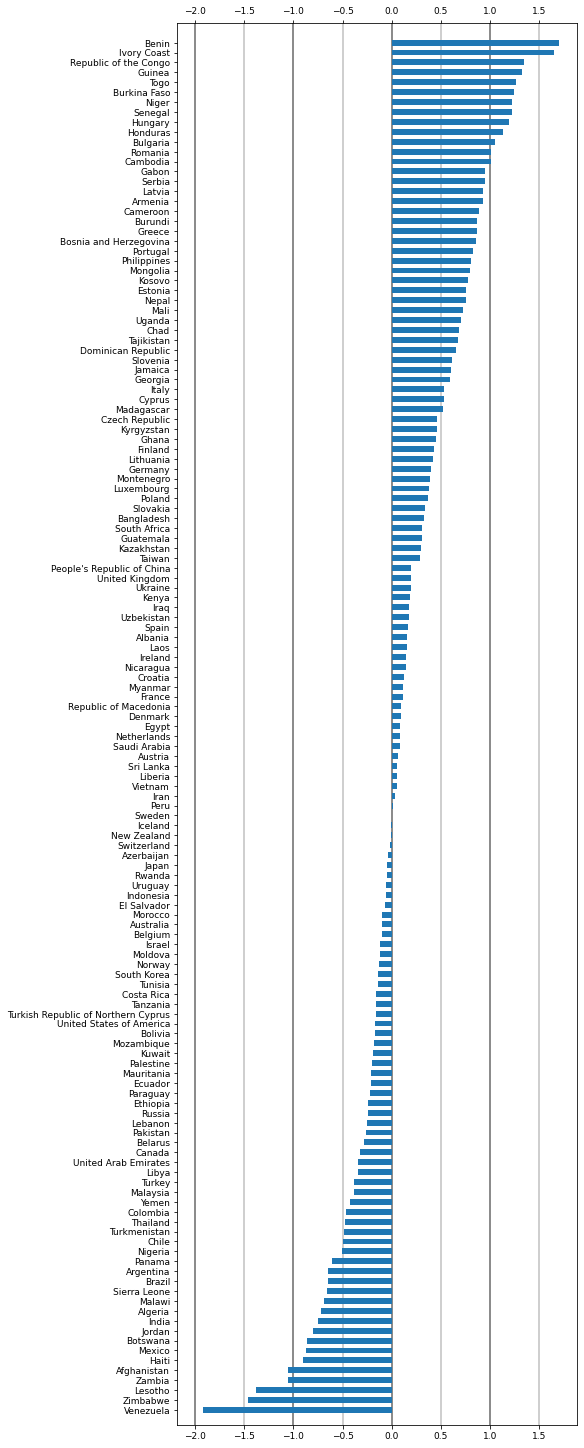

In [81]:
# Horizontal Barplot of 2015-2021 differences without standard errors (not in data)
plt.figure(figsize=(8,20))
plt.yticks(fontsize=14)
plt.ylim((-1.5,140))
plt.tick_params(top=True,bottom=True,labelbottom=True, labeltop=True,labelsize=9)

# vertical lines for better value-reading
plt.axvline(x=1.5,alpha=.25,color="black",zorder=0)
plt.axvline(x=1,alpha=.6,color="black",zorder=0)
plt.axvline(x=.5,alpha=.25,color="black",zorder=0)
plt.axvline(x=0,alpha=.6,color="black",zorder=0)
plt.axvline(x=-.5,alpha=.25,color="black",zorder=0)
plt.axvline(x=-1,alpha=.6,color="black",zorder=0)
plt.axvline(x=-1.5,alpha=.25,color="black",zorder=0)
plt.axvline(x=-2,alpha=.6,color="black",zorder=0)

# barplot
plt.barh(y=range(len(Diff_DF["Country name"])),
         width=Diff_DF["Happiness Difference"],
         height=.6,
         tick_label=Diff_DF["Country name"],
         capsize=3,
         zorder=1)

# SAVE AS PDF
# plt.savefig('country_2015_2021_difference_barplot.pdf',bbox_inches='tight')